In [1]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

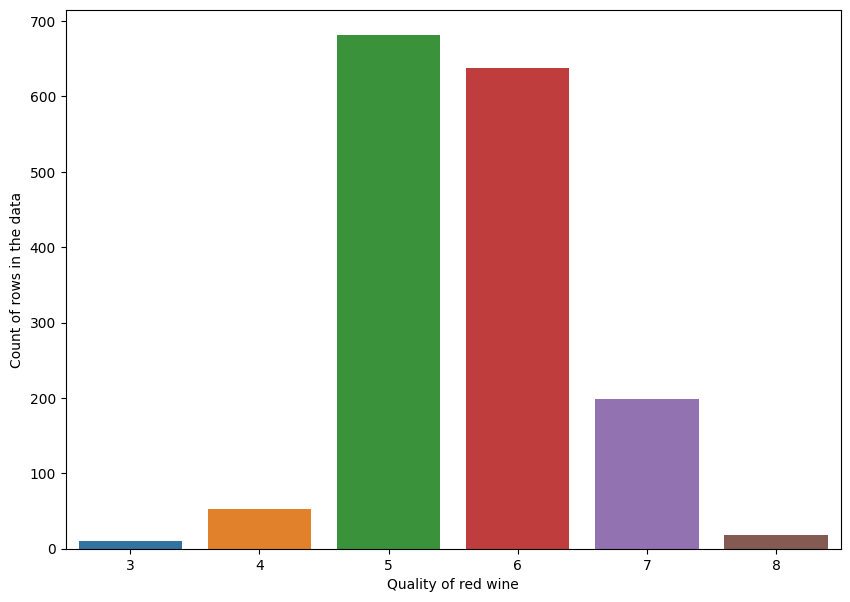

In [9]:
plt.figure(figsize=(10,7))
sns.countplot(x='quality', data = df)
plt.xlabel('Quality of red wine')
plt.ylabel('Count of rows in the data')
plt.show()

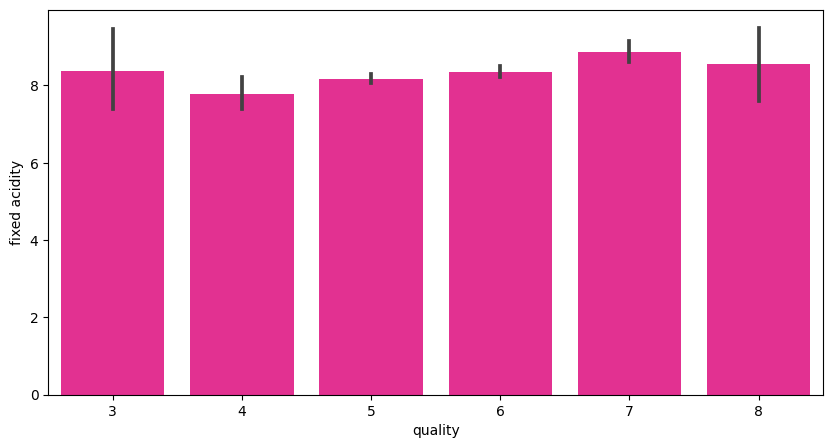

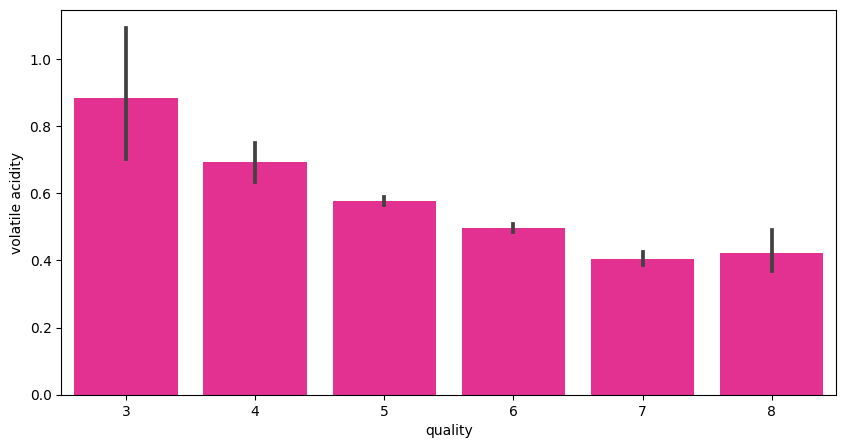

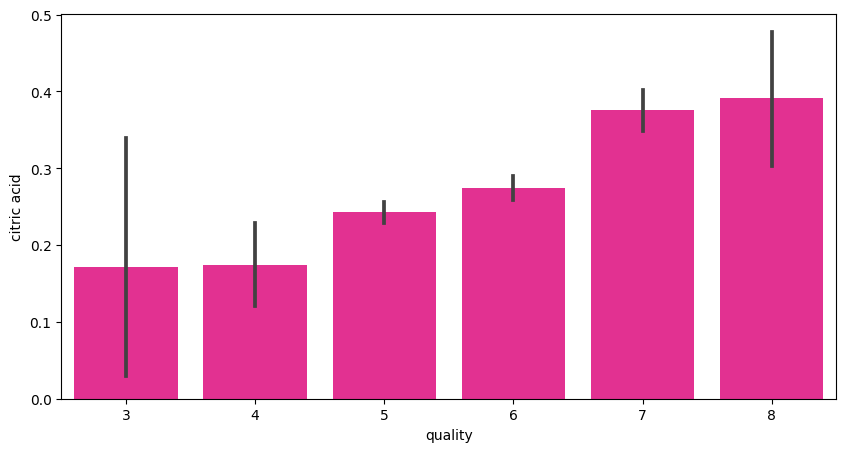

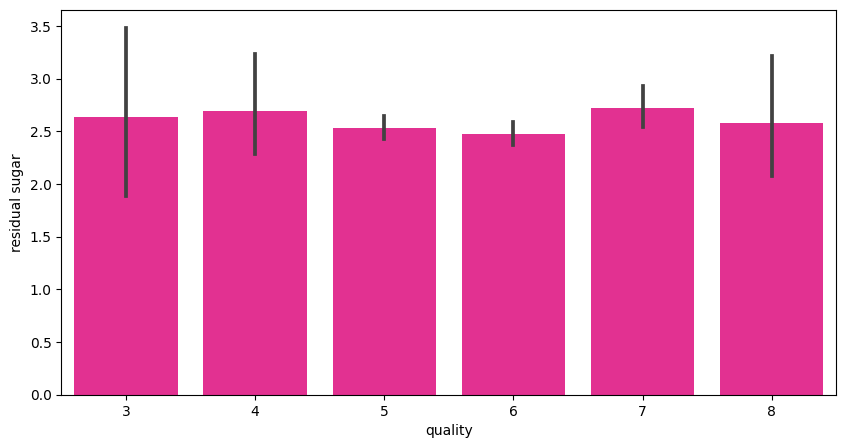

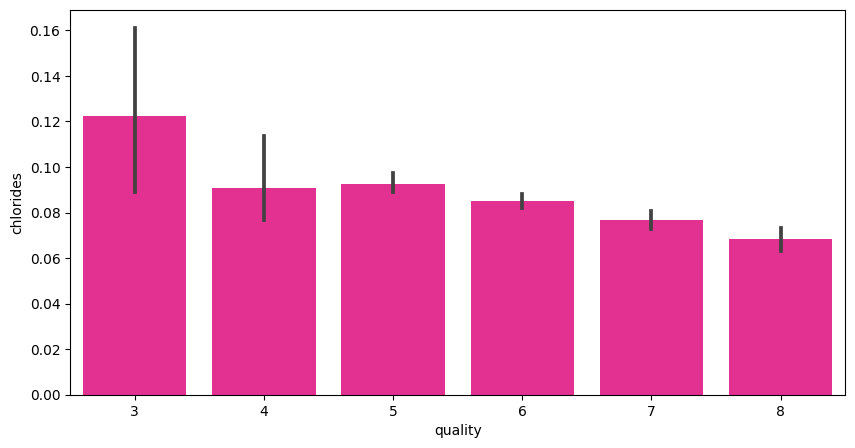

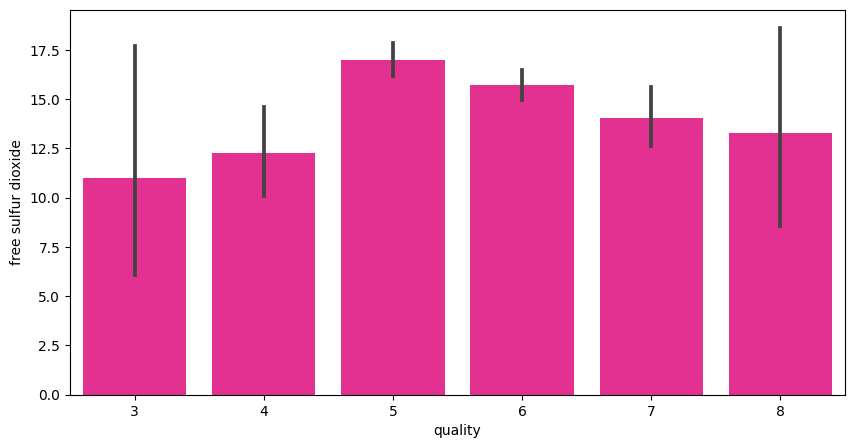

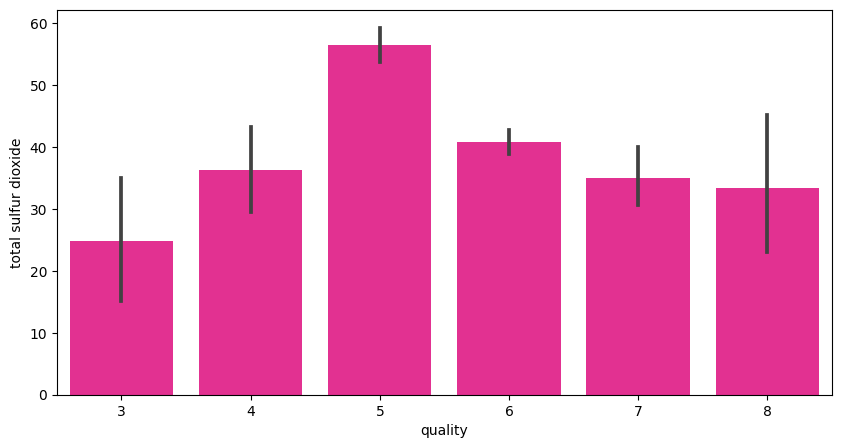

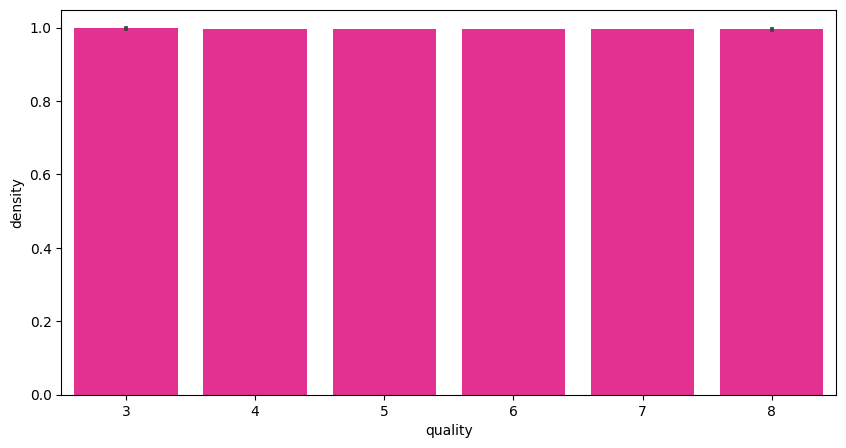

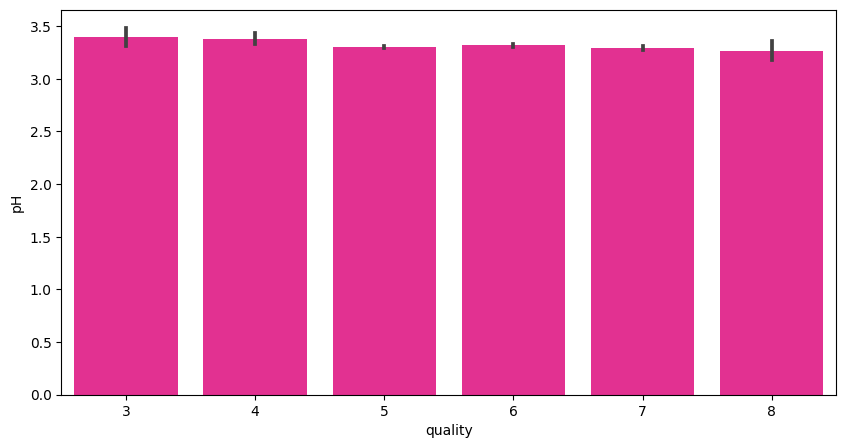

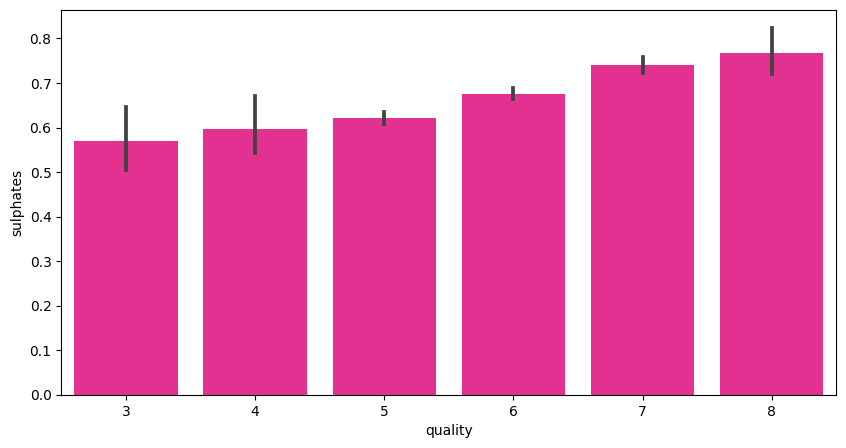

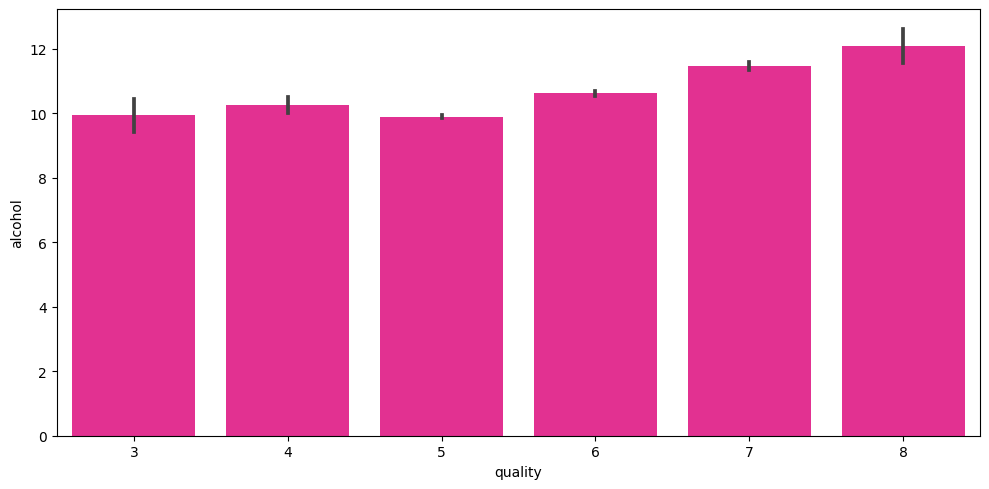

In [10]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data = df, color="deeppink")
plt.tight_layout()
plt.show()

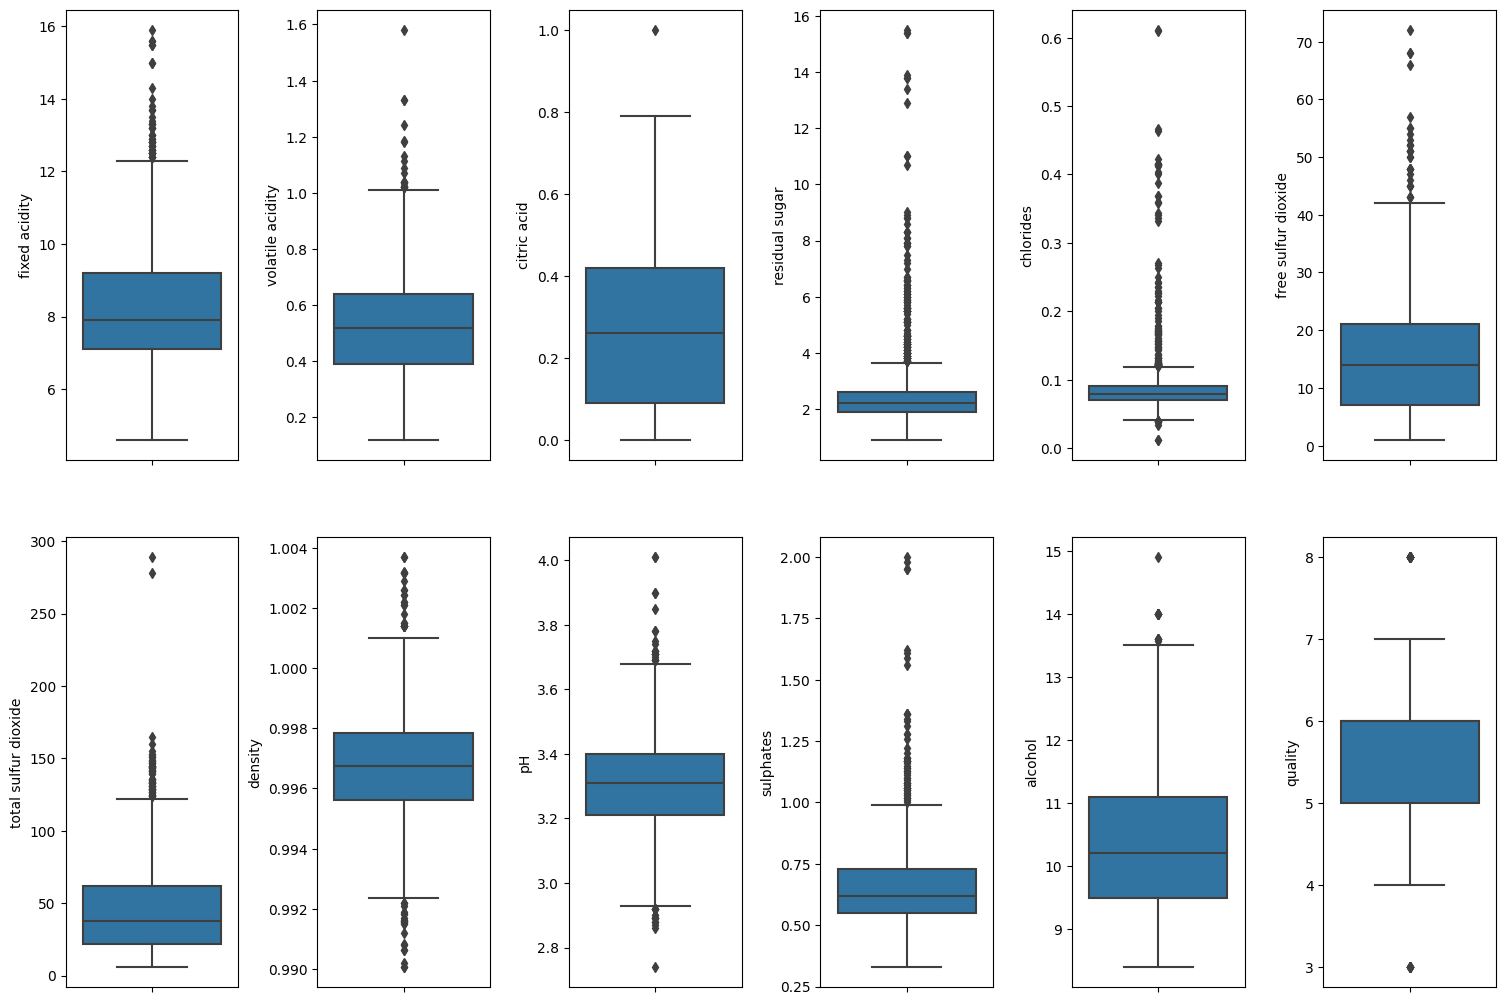

In [11]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index=0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax = ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

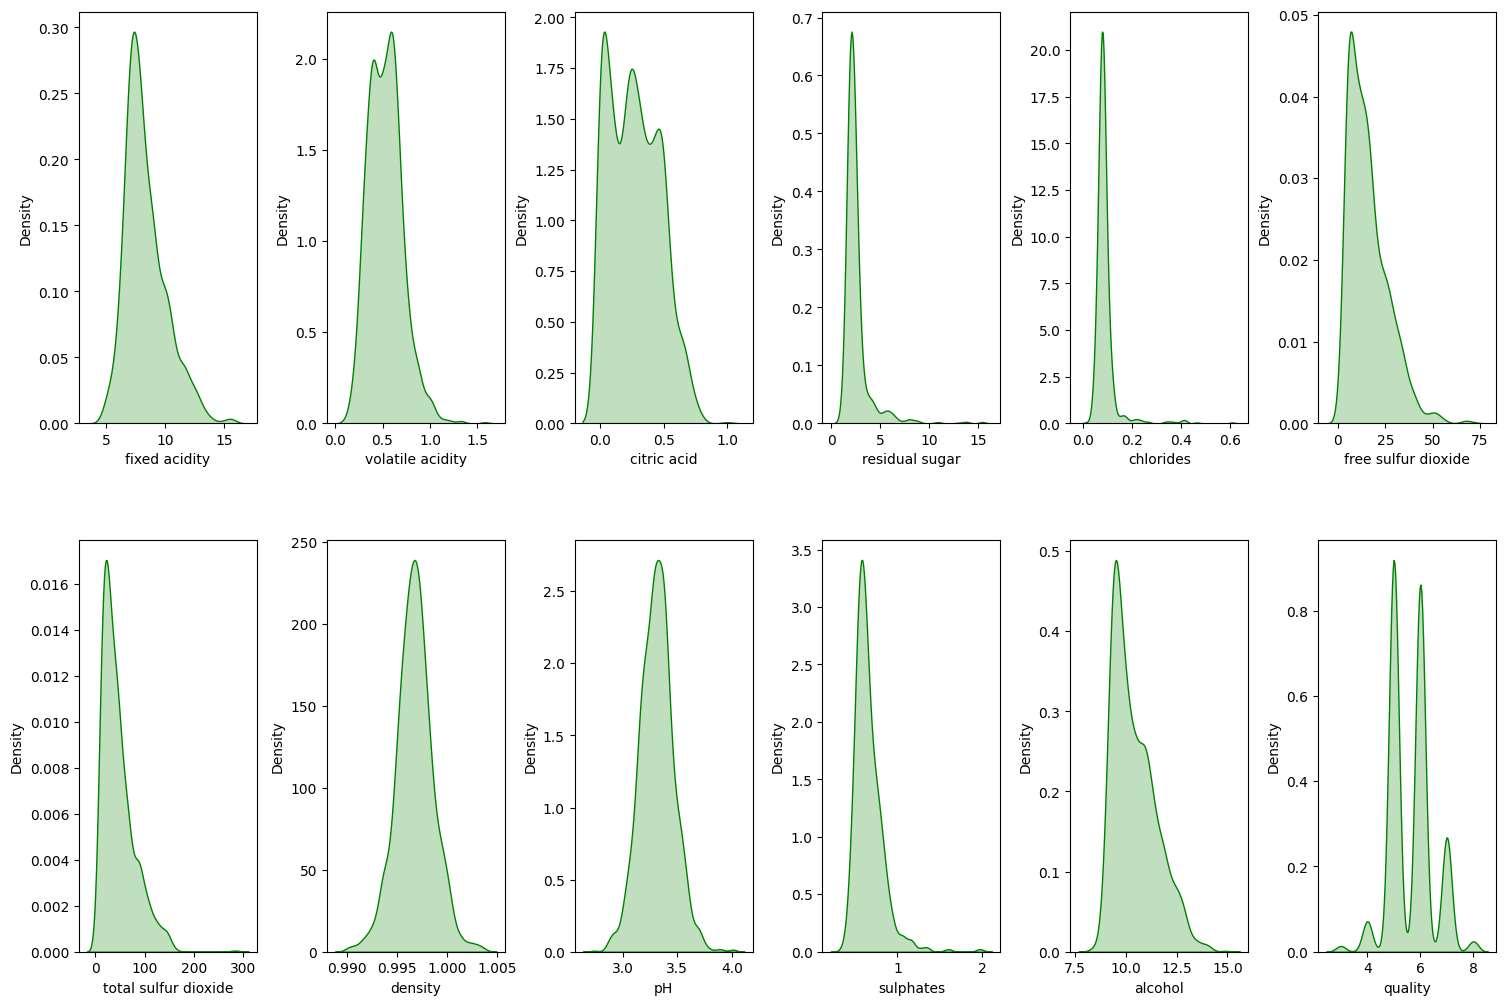

In [12]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist = False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

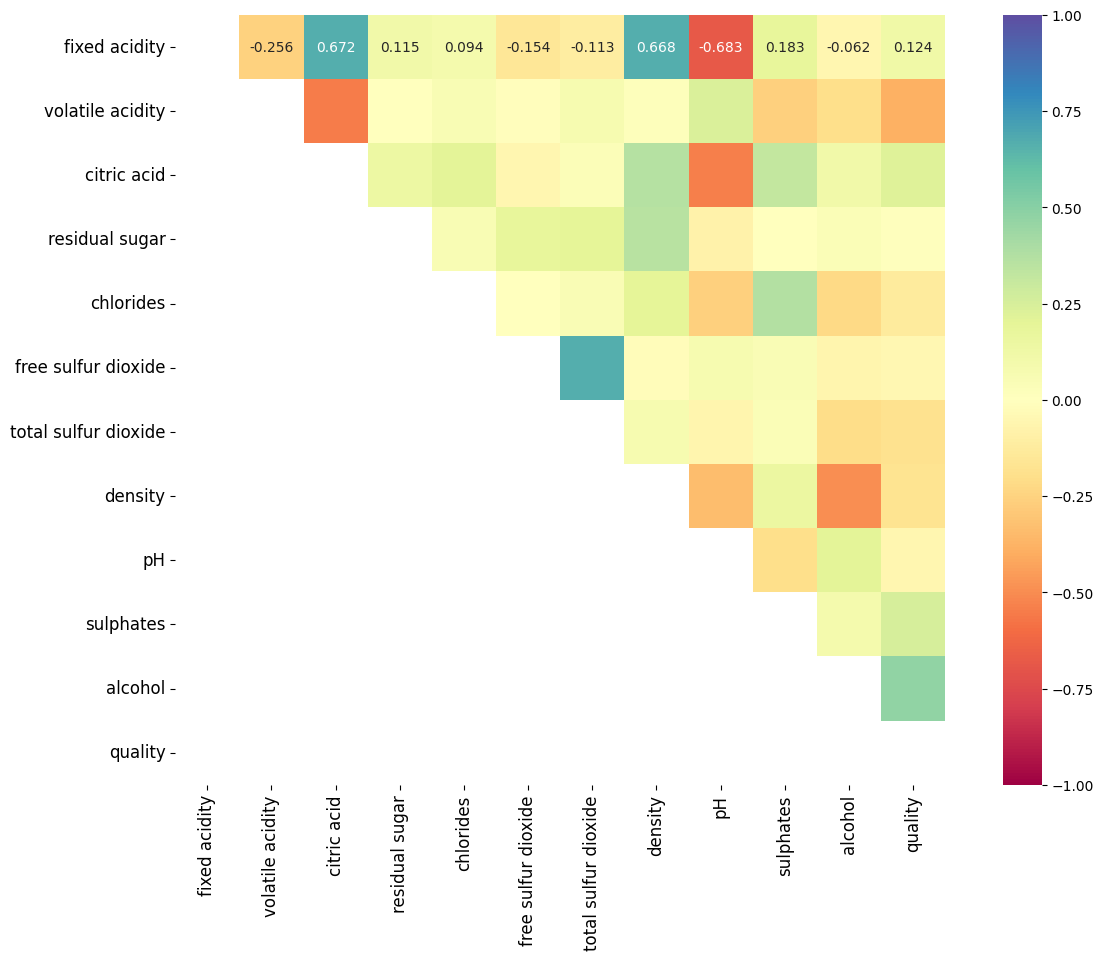

In [13]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', annot_kws={'size':10}, cmap="Spectral",mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [14]:
df = df.drop('free sulfur dioxide', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [15]:
df.shape

(1599, 11)

In [16]:
# z score method
z= np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [17]:
df.shape

(1464, 11)

In [18]:
# percentage of data loss

data_loss=(1599-1464)/1599*100

data_loss

8.442776735459661

In [19]:
#splitting the dataset
X= df.drop('quality', axis=1)
Y= df['quality']

In [20]:
Y.value_counts()

quality
5    624
6    590
7    187
4     47
8     16
Name: count, dtype: int64

In [21]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)


In [22]:
Y.value_counts()

quality
5    624
6    624
7    624
4    624
8    624
Name: count, dtype: int64

In [23]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
3115    8
3116    8
3117    8
3118    8
3119    8
Name: quality, Length: 3120, dtype: int64

In [24]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

In [25]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,8.614872,0.419405,0.393272,1.800000,0.068089,12.118975,0.995144,3.345836,0.690000,11.723795
3116,10.561487,0.344673,0.533196,2.621310,0.071065,16.106548,0.997115,3.150000,0.678768,11.074584
3117,7.956087,0.334320,0.373205,1.894422,0.062944,13.648074,0.996259,3.212718,1.002789,10.216025
3118,9.129943,0.303683,0.531767,2.664972,0.077668,16.508988,0.996351,3.159820,0.942096,11.491320


In [26]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.672763,1.047906,-1.508671,-0.642698,-0.149346,-0.104186,0.827176,1.467306,-0.801281,-1.252150
1,-0.422749,2.059348,-1.508671,0.150218,1.052479,1.147431,0.217511,-0.743414,0.102807,-0.894642
2,-0.422749,1.385053,-1.304131,-0.189603,0.724709,0.654370,0.339444,-0.315533,-0.123215,-0.894642
3,1.702371,-1.312127,1.354885,-0.642698,-0.203974,0.881937,0.949109,-1.028669,-0.650600,-0.894642
4,-0.672763,1.047906,-1.508671,-0.642698,-0.149346,-0.104186,0.827176,1.467306,-0.801281,-1.252150
...,...,...,...,...,...,...,...,...,...,...
3115,0.086575,-0.528792,0.502322,-0.755972,-0.581498,-0.934085,-0.792132,0.296593,0.178148,0.824789
3116,1.303278,-0.948723,1.217825,0.174356,-0.418910,-0.782845,0.409410,-1.099982,0.093525,0.244543
3117,-0.325189,-1.006893,0.399710,-0.649016,-0.862562,-0.876089,-0.112178,-0.652718,2.534720,-0.522811
3118,0.408512,-1.179051,1.210515,0.223814,-0.058242,-0.767581,-0.056290,-1.029951,2.077452,0.617010


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

In [28]:
# classification model function
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=21)
    
    #training the model
    model.fit(X_train, Y_train)
    
    # predicting Y_test
    pred = model.predict(X_test)
    
    # accuracy score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    #classification report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    #cross validation report
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross validation score:", cv_score)
    
    # result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)
    

In [29]:
#logistic regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 90.86538461538461

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       391
           1       0.86      0.91      0.88       233

    accuracy                           0.91       624
   macro avg       0.90      0.91      0.90       624
weighted avg       0.91      0.91      0.91       624

Cross validation score: 87.66025641025641

Accuracy Score - Cross Validation Score is 3.2051282051282044


In [30]:
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 92.62820512820514

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       391
           1       0.89      0.92      0.90       233

    accuracy                           0.93       624
   macro avg       0.92      0.92      0.92       624
weighted avg       0.93      0.93      0.93       624

Cross validation score: 89.87179487179488

Accuracy Score - Cross Validation Score is 2.7564102564102626


In [31]:
model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 92.78846153846155

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       391
           1       0.88      0.93      0.91       233

    accuracy                           0.93       624
   macro avg       0.92      0.93      0.92       624
weighted avg       0.93      0.93      0.93       624

Cross validation score: 88.75

Accuracy Score - Cross Validation Score is 4.038461538461547


In [32]:
model= RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 96.15384615384616

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       391
           1       0.93      0.97      0.95       233

    accuracy                           0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624

Cross validation score: 92.69230769230768

Accuracy Score - Cross Validation Score is 3.461538461538481


In [33]:
model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 91.50641025641025

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       391
           1       0.86      0.93      0.89       233

    accuracy                           0.92       624
   macro avg       0.91      0.92      0.91       624
weighted avg       0.92      0.92      0.92       624

Cross validation score: 87.91666666666667

Accuracy Score - Cross Validation Score is 3.589743589743577


In [34]:
model = ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 96.63461538461539

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       391
           1       0.94      0.97      0.96       233

    accuracy                           0.97       624
   macro avg       0.96      0.97      0.96       624
weighted avg       0.97      0.97      0.97       624

Cross validation score: 93.58974358974359

Accuracy Score - Cross Validation Score is 3.0448717948717956


In [35]:
model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 96.63461538461539

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       391
           1       0.93      0.98      0.96       233

    accuracy                           0.97       624
   macro avg       0.96      0.97      0.96       624
weighted avg       0.97      0.97      0.97       624

Cross validation score: 92.5

Accuracy Score - Cross Validation Score is 4.134615384615387


In [36]:
model=lgb.LGBMClassifier()
classify(model, X, Y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1015, number of negative: 1481
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 2496, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.406651 -> initscore=-0.377829
[LightGBM] [Info] Start training from score -0.377829
Accuracy Score: 96.47435897435898

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       391
           1       0.93      0.98      0.95       233

    accuracy                           0.96       624
   macro avg       0.96      0.97      0.96       624
weighted avg       0.97      0.96      0.96       624

[LightGBM] [Warning] Found whitespace in fe

In [37]:
svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
            'gamma': ['scale', 'auto'],
            'shrinking' : [True, False],
            'random_state' : [21,42,104],
            'probability' : [True, False],
            'decision_function_shape' : ['ovo', 'ovr'],
            'verbose' : [True, False]}

In [38]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

In [ ]:
GSCV.fit(X_train, Y_train)

[LibSVM].*.*
optimization finished, #iter = 2222
obj = -461.281081, rho = 0.513943
nSV = 577, nBSV = 490
Total nSV = 577
.*.*
optimization finished, #iter = 2440
obj = -445.375768, rho = 0.563634
nSV = 567, nBSV = 484
Total nSV = 567
.
*.*
optimization finished, #iter = 2237
obj = -452.360008, rho = 0.595314
nSV = 568, nBSV = 490
Total nSV = 568
.*
optimization finished, #iter = 1911
obj = -432.809451, rho = 0.580844
nSV = 550, nBSV = 473
Total nSV = 550
.
*.*
optimization finished, #iter = 2198
obj = -451.441641, rho = 0.518357
nSV = 575, nBSV = 498
Total nSV = 575
..*
optimization finished, #iter = 2926
obj = -548.626458, rho = -0.571294
nSV = 687, nBSV = 597
Total nSV = 687
[LibSVM].*
optimization finished, #iter = 1963
obj = -457.458164, rho = 0.555900
nSV = 574, nBSV = 495
Total nSV = 574
.*.*
optimization finished, #iter = 2378
obj = -435.841506, rho = 0.600508
nSV = 553, nBSV = 482
Total nSV = 553
.*
optimization finished, #iter = 1510
obj = -427.231796, rho = 0.555062
nSV = 545

[LibSVM].*
optimization finished, #iter = 1036
obj = -406.145335, rho = -0.931724
nSV = 540, nBSV = 431
Total nSV = 540
[LibSVM]*
optimization finished, #iter = 770
obj = -400.837749, rho = -0.967020
nSV = 530, nBSV = 435
Total nSV = 530
[LibSVM].*
optimization finished, #iter = 1036
obj = -422.395745, rho = -1.000395
nSV = 560, nBSV = 450
Total nSV = 560
[LibSVM]*
optimization finished, #iter = 987
obj = -416.444069, rho = -0.944280
nSV = 556, nBSV = 444
Total nSV = 556
[LibSVM]*
optimization finished, #iter = 917
obj = -394.583156, rho = -0.918780
nSV = 533, nBSV = 422
Total nSV = 533
[LibSVM]*.*
optimization finished, #iter = 1036
obj = -406.145335, rho = -0.931724
nSV = 540, nBSV = 431
Total nSV = 540
[LibSVM]*
optimization finished, #iter = 770
obj = -400.837749, rho = -0.967020
nSV = 530, nBSV = 435
Total nSV = 530
[LibSVM]*.*
optimization finished, #iter = 1036
obj = -422.395745, rho = -1.000395
nSV = 561, nBSV = 450
Total nSV = 561
[LibSVM]*
optimization finished, #iter = 987
o

[LibSVM].
*.*
optimization finished, #iter = 2001
obj = -457.722924, rho = 0.592891
nSV = 576, nBSV = 501
Total nSV = 576
.*
optimization finished, #iter = 1975
obj = -424.478036, rho = 0.597622
nSV = 542, nBSV = 468
Total nSV = 542
.*.*
optimization finished, #iter = 2384
obj = -442.185554, rho = 0.580670
nSV = 567, nBSV = 486
Total nSV = 567
.
*.*
optimization finished, #iter = 2379
obj = -439.596510, rho = 0.602682
nSV = 570, nBSV = 486
Total nSV = 570
.
*
optimization finished, #iter = 1917
obj = -443.446480, rho = 0.547877
nSV = 564, nBSV = 489
Total nSV = 564
.
*.*
optimization finished, #iter = 2565
obj = -541.157759, rho = -0.594911
nSV = 686, nBSV = 599
Total nSV = 686
[LibSVM].
*
optimization finished, #iter = 1771
obj = -449.088438, rho = 0.540281
nSV = 570, nBSV = 491
Total nSV = 570
.*.*
optimization finished, #iter = 2140
obj = -421.805044, rho = 0.553808
nSV = 540, nBSV = 460
Total nSV = 540
.
*.*
optimization finished, #iter = 2259
obj = -443.635350, rho = 0.565830
nSV 

..*.*
optimization finished, #iter = 3706
obj = -529.543703, rho = -0.574251
nSV = 667, nBSV = 576
Total nSV = 667
[LibSVM]*.*
optimization finished, #iter = 1268
obj = -436.302792, rho = 0.579051
nSV = 542, nBSV = 480
Total nSV = 542
.*
optimization finished, #iter = 1585
obj = -444.305146, rho = 0.614310
nSV = 560, nBSV = 495
Total nSV = 560
.*
optimization finished, #iter = 1916
obj = -435.996194, rho = 0.600851
nSV = 554, nBSV = 475
Total nSV = 554
.*
optimization finished, #iter = 1667
obj = -456.684512, rho = 0.583633
nSV = 571, nBSV = 496
Total nSV = 571
.*
optimization finished, #iter = 1856
obj = -449.209098, rho = 0.567146
nSV = 564, nBSV = 490
Total nSV = 564
.
*.*
optimization finished, #iter = 2852
obj = -543.921131, rho = -0.601040
nSV = 684, nBSV = 585
Total nSV = 684
[LibSVM].*
optimization finished, #iter = 1917
obj = -433.691540, rho = 0.556051
nSV = 552, nBSV = 469
Total nSV = 552
.*
optimization finished, #iter = 1813
obj = -444.690289, rho = 0.554072
nSV = 564, nBS

[LibSVM].
*.*
optimization finished, #iter = 2565
obj = -541.157759, rho = -0.594911
nSV = 686, nBSV = 599
Total nSV = 686
[LibSVM]..*.*
optimization finished, #iter = 3706
obj = -529.543703, rho = -0.574251
nSV = 667, nBSV = 576
Total nSV = 667
[LibSVM].
*.*
optimization finished, #iter = 2852
obj = -543.921131, rho = -0.601040
nSV = 684, nBSV = 585
Total nSV = 684
[LibSVM]..*.*
optimization finished, #iter = 3190
obj = -544.419435, rho = -0.573421
nSV = 686, nBSV = 587
Total nSV = 686
[LibSVM].
*.*
optimization finished, #iter = 2172
obj = -507.301529, rho = -0.557517
nSV = 638, nBSV = 553
Total nSV = 638
[LibSVM]..*
optimization finished, #iter = 2314
obj = -541.157761, rho = -0.594904
nSV = 679, nBSV = 600
Total nSV = 679
[LibSVM]...*
optimization finished, #iter = 3339
obj = -529.543709, rho = -0.574208
nSV = 659, nBSV = 575
Total nSV = 659
[LibSVM]..*
optimization finished, #iter = 2991
obj = -543.921147, rho = -0.601081
nSV = 674, nBSV = 587
Total nSV = 674
[LibSVM]...*
optimiza

*
optimization finished, #iter = 420
obj = -1236.400470, rho = 1.457259
nSV = 398, nBSV = 393
Total nSV = 398
*
optimization finished, #iter = 329
obj = -2111.737463, rho = -3.026323
nSV = 438, nBSV = 434
Total nSV = 438
[LibSVM]*
optimization finished, #iter = 339
obj = -1021.482565, rho = 1.852297
nSV = 359, nBSV = 351
Total nSV = 359
*
optimization finished, #iter = 567
obj = -1433.336056, rho = 2.268404
nSV = 378, nBSV = 373
Total nSV = 378
*
optimization finished, #iter = 331
obj = -1242.791745, rho = 2.373986
nSV = 360, nBSV = 357
Total nSV = 360
*
optimization finished, #iter = 468
obj = -1402.787906, rho = 2.370959
nSV = 355, nBSV = 350
Total nSV = 355
*
optimization finished, #iter = 266
obj = -1390.151250, rho = 1.998652
nSV = 375, nBSV = 370
Total nSV = 375
*
optimization finished, #iter = 496
obj = -2025.446976, rho = -2.261850
nSV = 459, nBSV = 453
Total nSV = 459
[LibSVM]*
optimization finished, #iter = 515
obj = -1461.075448, rho = 2.216428
nSV = 369, nBSV = 363
Total nS

[LibSVM]*
optimization finished, #iter = 326
obj = -1380.999190, rho = 2.335374
nSV = 382, nBSV = 378
Total nSV = 382
*
optimization finished, #iter = 375
obj = -1202.930182, rho = 2.634134
nSV = 399, nBSV = 393
Total nSV = 399
*
optimization finished, #iter = 650
obj = -1365.843233, rho = 2.122152
nSV = 400, nBSV = 394
Total nSV = 400
*
optimization finished, #iter = 252
obj = -1509.038615, rho = 2.185309
nSV = 382, nBSV = 376
Total nSV = 382
*
optimization finished, #iter = 271
obj = -1466.727360, rho = 2.229183
nSV = 385, nBSV = 379
Total nSV = 385
*
optimization finished, #iter = 401
obj = -2160.088696, rho = -2.605165
nSV = 463, nBSV = 458
Total nSV = 463
[LibSVM]*
optimization finished, #iter = 233
obj = -1380.477396, rho = 2.376282
nSV = 344, nBSV = 340
Total nSV = 344
*
optimization finished, #iter = 232
obj = -1377.372367, rho = 2.344861
nSV = 351, nBSV = 346
Total nSV = 351
*
optimization finished, #iter = 337
obj = -1343.206841, rho = 2.279880
nSV = 340, nBSV = 335
Total nSV

*
optimization finished, #iter = 863
obj = -344.573999, rho = 0.899714
nSV = 468, nBSV = 360
Total nSV = 468
*
optimization finished, #iter = 987
obj = -416.304042, rho = -0.943616
nSV = 557, nBSV = 442
Total nSV = 557
[LibSVM]*
optimization finished, #iter = 791
obj = -334.451676, rho = 0.816186
nSV = 459, nBSV = 348
Total nSV = 459
*
optimization finished, #iter = 772
obj = -318.175594, rho = 0.803756
nSV = 442, nBSV = 333
Total nSV = 442
*
optimization finished, #iter = 689
obj = -311.128906, rho = 0.847618
nSV = 427, nBSV = 325
Total nSV = 427
*
optimization finished, #iter = 775
obj = -326.926091, rho = 0.924768
nSV = 445, nBSV = 349
Total nSV = 445
*
optimization finished, #iter = 779
obj = -316.835552, rho = 0.809713
nSV = 438, nBSV = 336
Total nSV = 438
*
optimization finished, #iter = 948
obj = -392.767118, rho = -0.910587
nSV = 532, nBSV = 420
Total nSV = 532
[LibSVM]*
optimization finished, #iter = 684
obj = -332.373730, rho = 0.936047
nSV = 449, nBSV = 360
Total nSV = 449
*

*
optimization finished, #iter = 756
obj = -399.986021, rho = -0.964160
nSV = 529, nBSV = 433
Total nSV = 529
[LibSVM]*
optimization finished, #iter = 793
obj = -346.812631, rho = 0.925892
nSV = 469, nBSV = 369
Total nSV = 469
*
optimization finished, #iter = 738
obj = -336.494584, rho = 0.815114
nSV = 441, nBSV = 355
Total nSV = 441
*
optimization finished, #iter = 773
obj = -345.230188, rho = 0.953706
nSV = 478, nBSV = 372
Total nSV = 478
*
optimization finished, #iter = 673
obj = -341.819544, rho = 0.958098
nSV = 455, nBSV = 364
Total nSV = 455
*
optimization finished, #iter = 787
obj = -354.442837, rho = 0.909896
nSV = 471, nBSV = 369
Total nSV = 471
.*
optimization finished, #iter = 1065
obj = -422.626592, rho = -1.001679
nSV = 560, nBSV = 452
Total nSV = 560
[LibSVM]*
optimization finished, #iter = 784
obj = -341.892842, rho = 0.894429
nSV = 466, nBSV = 363
Total nSV = 466
*
optimization finished, #iter = 742
obj = -331.799954, rho = 0.887454
nSV = 442, nBSV = 348
Total nSV = 442

[LibSVM]*.*
optimization finished, #iter = 1012
obj = -405.618479, rho = -0.929262
nSV = 543, nBSV = 429
Total nSV = 543
[LibSVM]*
optimization finished, #iter = 756
obj = -399.986021, rho = -0.964160
nSV = 529, nBSV = 433
Total nSV = 529
[LibSVM]*.*
optimization finished, #iter = 1065
obj = -422.626592, rho = -1.001678
nSV = 561, nBSV = 452
Total nSV = 561
[LibSVM]*
optimization finished, #iter = 987
obj = -416.304042, rho = -0.943616
nSV = 557, nBSV = 442
Total nSV = 557
[LibSVM]*
optimization finished, #iter = 948
obj = -392.767118, rho = -0.910587
nSV = 532, nBSV = 420
Total nSV = 532
[LibSVM].*
optimization finished, #iter = 1012
obj = -405.618479, rho = -0.929263
nSV = 542, nBSV = 429
Total nSV = 542
[LibSVM]*
optimization finished, #iter = 756
obj = -399.986021, rho = -0.964160
nSV = 529, nBSV = 433
Total nSV = 529
[LibSVM].*
optimization finished, #iter = 1065
obj = -422.626592, rho = -1.001679
nSV = 560, nBSV = 452
Total nSV = 560
[LibSVM]*
optimization finished, #iter = 987
o

.*
optimization finished, #iter = 1503
obj = -439.638532, rho = 0.542824
nSV = 553, nBSV = 487
Total nSV = 553
..*
optimization finished, #iter = 2911
obj = -531.948680, rho = -0.573560
nSV = 663, nBSV = 584
Total nSV = 663
[LibSVM].*
optimization finished, #iter = 1646
obj = -464.074942, rho = 0.609015
nSV = 579, nBSV = 505
Total nSV = 579
..*
optimization finished, #iter = 2148
obj = -426.410272, rho = 0.590593
nSV = 540, nBSV = 466
Total nSV = 540
.*
optimization finished, #iter = 1851
obj = -437.426792, rho = 0.595389
nSV = 548, nBSV = 476
Total nSV = 548
.*
optimization finished, #iter = 1817
obj = -451.528563, rho = 0.584234
nSV = 564, nBSV = 490
Total nSV = 564
.*
optimization finished, #iter = 1749
obj = -434.559658, rho = 0.587901
nSV = 546, nBSV = 474
Total nSV = 546
..*
optimization finished, #iter = 2856
obj = -543.304045, rho = -0.601445
nSV = 675, nBSV = 586
Total nSV = 675
[LibSVM].*
optimization finished, #iter = 1884
obj = -453.157054, rho = 0.584895
nSV = 569, nBSV = 

.*
optimization finished, #iter = 1701
obj = -439.245652, rho = 0.568143
nSV = 562, nBSV = 488
Total nSV = 562
..*
optimization finished, #iter = 2014
obj = -443.482374, rho = 0.596299
nSV = 564, nBSV = 483
Total nSV = 564
.*
optimization finished, #iter = 1650
obj = -445.288140, rho = 0.604844
nSV = 568, nBSV = 495
Total nSV = 568
...*
optimization finished, #iter = 3058
obj = -544.807412, rho = -0.573206
nSV = 679, nBSV = 590
Total nSV = 679
[LibSVM]..*
optimization finished, #iter = 2222
obj = -424.579104, rho = 0.480235
nSV = 550, nBSV = 471
Total nSV = 550
.*
optimization finished, #iter = 1521
obj = -426.005523, rho = 0.542415
nSV = 535, nBSV = 471
Total nSV = 535
.*
optimization finished, #iter = 1560
obj = -407.160284, rho = 0.549985
nSV = 518, nBSV = 455
Total nSV = 518
.*
optimization finished, #iter = 1933
obj = -421.955050, rho = 0.597159
nSV = 539, nBSV = 468
Total nSV = 539
.*
optimization finished, #iter = 1640
obj = -422.819989, rho = 0.565952
nSV = 543, nBSV = 470
Tota

[LibSVM]..*
optimization finished, #iter = 2381
obj = -542.852657, rho = -0.595488
nSV = 682, nBSV = 605
Total nSV = 682
[LibSVM]..*
optimization finished, #iter = 2911
obj = -531.948680, rho = -0.573560
nSV = 663, nBSV = 584
Total nSV = 663
[LibSVM]..*
optimization finished, #iter = 2856
obj = -543.304045, rho = -0.601445
nSV = 675, nBSV = 586
Total nSV = 675
[LibSVM]...*
optimization finished, #iter = 3058
obj = -544.807412, rho = -0.573206
nSV = 679, nBSV = 590
Total nSV = 679
[LibSVM]..*
optimization finished, #iter = 2346
obj = -512.836319, rho = -0.552989
nSV = 643, nBSV = 563
Total nSV = 643
[LibSVM].
*.*
optimization finished, #iter = 2441
obj = -542.852658, rho = -0.595494
nSV = 689, nBSV = 605
Total nSV = 689
[LibSVM]..*
optimization finished, #iter = 2832
obj = -531.948678, rho = -0.573526
nSV = 666, nBSV = 586
Total nSV = 666
[LibSVM].
*.*
optimization finished, #iter = 2932
obj = -543.304051, rho = -0.601430
nSV = 683, nBSV = 587
Total nSV = 683
[LibSVM]..*.*
optimization 

*
optimization finished, #iter = 259
obj = -1421.989582, rho = 1.821275
nSV = 380, nBSV = 373
Total nSV = 380
*
optimization finished, #iter = 254
obj = -1604.843105, rho = 2.475557
nSV = 369, nBSV = 364
Total nSV = 369
*
optimization finished, #iter = 230
obj = -1509.091552, rho = 1.904731
nSV = 371, nBSV = 369
Total nSV = 371
*
optimization finished, #iter = 274
obj = -1661.126461, rho = 2.419705
nSV = 371, nBSV = 367
Total nSV = 371
*
optimization finished, #iter = 468
obj = -2326.568245, rho = -2.427885
nSV = 462, nBSV = 457
Total nSV = 462
[LibSVM]*
optimization finished, #iter = 369
obj = -1274.721706, rho = 1.989706
nSV = 395, nBSV = 391
Total nSV = 395
*
optimization finished, #iter = 298
obj = -1266.927326, rho = 1.761829
nSV = 339, nBSV = 334
Total nSV = 339
*
optimization finished, #iter = 386
obj = -1363.910820, rho = 2.892124
nSV = 350, nBSV = 345
Total nSV = 350
*
optimization finished, #iter = 309
obj = -1345.166275, rho = 2.246972
nSV = 339, nBSV = 335
Total nSV = 339
*

*
optimization finished, #iter = 323
obj = -2082.865741, rho = -3.003767
nSV = 437, nBSV = 432
Total nSV = 437
[LibSVM]*
optimization finished, #iter = 311
obj = -1278.884519, rho = 1.519011
nSV = 367, nBSV = 363
Total nSV = 367
*
optimization finished, #iter = 360
obj = -1209.284459, rho = 2.762758
nSV = 375, nBSV = 370
Total nSV = 375
*
optimization finished, #iter = 417
obj = -1322.878078, rho = 1.838908
nSV = 362, nBSV = 358
Total nSV = 362
*
optimization finished, #iter = 505
obj = -1499.745322, rho = 1.606738
nSV = 386, nBSV = 382
Total nSV = 386
*
optimization finished, #iter = 353
obj = -1422.536346, rho = 2.098963
nSV = 380, nBSV = 376
Total nSV = 380
*
optimization finished, #iter = 482
obj = -2032.472207, rho = -2.252164
nSV = 459, nBSV = 454
Total nSV = 459
[LibSVM]*
optimization finished, #iter = 370
obj = -1594.688937, rho = 1.852687
nSV = 375, nBSV = 371
Total nSV = 375
*
optimization finished, #iter = 284
obj = -1508.988841, rho = 2.183398
nSV = 358, nBSV = 352
Total nS

[LibSVM]*
optimization finished, #iter = 404
obj = -2141.674715, rho = -2.590769
nSV = 464, nBSV = 458
Total nSV = 464
[LibSVM]*
optimization finished, #iter = 323
obj = -2082.865741, rho = -3.003767
nSV = 437, nBSV = 432
Total nSV = 437
[LibSVM]*
optimization finished, #iter = 482
obj = -2032.472207, rho = -2.252164
nSV = 459, nBSV = 454
Total nSV = 459
[LibSVM]*
optimization finished, #iter = 468
obj = -2326.568245, rho = -2.427885
nSV = 462, nBSV = 457
Total nSV = 462
[LibSVM]*
optimization finished, #iter = 300
obj = -1998.987276, rho = -2.559806
nSV = 417, nBSV = 412
Total nSV = 417
[LibSVM]*
optimization finished, #iter = 643
obj = -332.817786, rho = 0.937918
nSV = 449, nBSV = 359
Total nSV = 449
*
optimization finished, #iter = 875
obj = -326.172702, rho = 0.877400
nSV = 453, nBSV = 337
Total nSV = 453
*
optimization finished, #iter = 783
obj = -329.557366, rho = 0.952135
nSV = 452, nBSV = 351
Total nSV = 452
*
optimization finished, #iter = 740
obj = -322.445813, rho = 0.834004

*
optimization finished, #iter = 770
obj = -400.837749, rho = -0.967020
nSV = 530, nBSV = 435
Total nSV = 530
[LibSVM]*
optimization finished, #iter = 822
obj = -346.622371, rho = 0.925016
nSV = 469, nBSV = 368
Total nSV = 469
*
optimization finished, #iter = 721
obj = -336.336587, rho = 0.814429
nSV = 441, nBSV = 354
Total nSV = 441
*
optimization finished, #iter = 827
obj = -345.030359, rho = 0.952758
nSV = 477, nBSV = 370
Total nSV = 477
*
optimization finished, #iter = 678
obj = -341.626357, rho = 0.956888
nSV = 455, nBSV = 363
Total nSV = 455
*
optimization finished, #iter = 805
obj = -354.268913, rho = 0.908816
nSV = 472, nBSV = 370
Total nSV = 472
*.*
optimization finished, #iter = 1036
obj = -422.395745, rho = -1.000395
nSV = 561, nBSV = 450
Total nSV = 561
[LibSVM]*
optimization finished, #iter = 809
obj = -342.007574, rho = 0.895026
nSV = 466, nBSV = 365
Total nSV = 466
*
optimization finished, #iter = 746
obj = -331.896468, rho = 0.888041
nSV = 442, nBSV = 347
Total nSV = 44

[LibSVM]*
optimization finished, #iter = 812
obj = -329.498053, rho = 0.793006
nSV = 441, nBSV = 338
Total nSV = 441
*
optimization finished, #iter = 815
obj = -339.601845, rho = 1.038856
nSV = 449, nBSV = 355
Total nSV = 449
*
optimization finished, #iter = 890
obj = -325.747224, rho = 0.827204
nSV = 457, nBSV = 343
Total nSV = 457
*
optimization finished, #iter = 852
obj = -333.912528, rho = 0.900887
nSV = 462, nBSV = 345
Total nSV = 462
*
optimization finished, #iter = 711
obj = -331.588061, rho = 0.897911
nSV = 440, nBSV = 355
Total nSV = 440
.*
optimization finished, #iter = 1036
obj = -406.145335, rho = -0.931724
nSV = 540, nBSV = 431
Total nSV = 540
[LibSVM]*
optimization finished, #iter = 701
obj = -327.765316, rho = 0.806292
nSV = 444, nBSV = 348
Total nSV = 444
*
optimization finished, #iter = 687
obj = -322.847799, rho = 1.007455
nSV = 435, nBSV = 345
Total nSV = 435
*
optimization finished, #iter = 743
obj = -315.946999, rho = 0.828319
nSV = 433, nBSV = 342
Total nSV = 433


..*.*
optimization finished, #iter = 3190
obj = -544.419435, rho = -0.573421
nSV = 686, nBSV = 587
Total nSV = 686
[LibSVM].*
optimization finished, #iter = 1772
obj = -437.196893, rho = 0.544648
nSV = 555, nBSV = 480
Total nSV = 555
.*
optimization finished, #iter = 1801
obj = -413.749097, rho = 0.536695
nSV = 525, nBSV = 458
Total nSV = 525
.*
optimization finished, #iter = 1707
obj = -397.291591, rho = 0.566067
nSV = 512, nBSV = 437
Total nSV = 512
.*
optimization finished, #iter = 1558
obj = -424.911901, rho = 0.559819
nSV = 545, nBSV = 473
Total nSV = 545
.*
optimization finished, #iter = 1442
obj = -399.288699, rho = 0.589520
nSV = 513, nBSV = 441
Total nSV = 513
.
*.*
optimization finished, #iter = 2172
obj = -507.301529, rho = -0.557517
nSV = 638, nBSV = 553
Total nSV = 638
[LibSVM].*
optimization finished, #iter = 1874
obj = -447.063388, rho = 0.567188
nSV = 560, nBSV = 490
Total nSV = 560
.*
optimization finished, #iter = 1893
obj = -439.122902, rho = 0.608477
nSV = 559, nBSV

.*
optimization finished, #iter = 1783
obj = -434.119242, rho = 0.561944
nSV = 558, nBSV = 484
Total nSV = 558
...*
optimization finished, #iter = 3339
obj = -529.543709, rho = -0.574208
nSV = 659, nBSV = 575
Total nSV = 659
[LibSVM].*
optimization finished, #iter = 1802
obj = -451.023059, rho = 0.554869
nSV = 570, nBSV = 500
Total nSV = 570
.*
optimization finished, #iter = 1478
obj = -434.571773, rho = 0.562468
nSV = 538, nBSV = 471
Total nSV = 538
..*
optimization finished, #iter = 2861
obj = -442.910385, rho = 0.593858
nSV = 561, nBSV = 482
Total nSV = 561
.*
optimization finished, #iter = 1626
obj = -437.278167, rho = 0.640504
nSV = 549, nBSV = 477
Total nSV = 549
.*
optimization finished, #iter = 1485
obj = -452.902663, rho = 0.611287
nSV = 567, nBSV = 500
Total nSV = 567
..*
optimization finished, #iter = 2991
obj = -543.921147, rho = -0.601081
nSV = 674, nBSV = 587
Total nSV = 674
[LibSVM]..*
optimization finished, #iter = 2232
obj = -454.142775, rho = 0.510732
nSV = 579, nBSV 

..*
optimization finished, #iter = 2255
obj = -433.862490, rho = 0.623873
nSV = 548, nBSV = 475
Total nSV = 548
..*
optimization finished, #iter = 2077
obj = -458.178485, rho = 0.555580
nSV = 574, nBSV = 501
Total nSV = 574
..*
optimization finished, #iter = 2199
obj = -452.120527, rho = 0.554610
nSV = 576, nBSV = 497
Total nSV = 576
...*
optimization finished, #iter = 3288
obj = -544.419439, rho = -0.573490
nSV = 678, nBSV = 589
Total nSV = 678
[LibSVM].*
optimization finished, #iter = 1798
obj = -399.325744, rho = 0.550921
nSV = 510, nBSV = 439
Total nSV = 510
.*
optimization finished, #iter = 1651
obj = -415.299169, rho = 0.554771
nSV = 529, nBSV = 460
Total nSV = 529
.*
optimization finished, #iter = 1558
obj = -412.683768, rho = 0.585112
nSV = 529, nBSV = 456
Total nSV = 529
.*
optimization finished, #iter = 1880
obj = -429.906475, rho = 0.564114
nSV = 548, nBSV = 476
Total nSV = 548
..*
optimization finished, #iter = 2161
obj = -420.485289, rho = 0.510818
nSV = 539, nBSV = 460
To

[LibSVM]*
optimization finished, #iter = 317
obj = -1520.302591, rho = 1.840758
nSV = 376, nBSV = 370
Total nSV = 376
*
optimization finished, #iter = 313
obj = -1403.368424, rho = 2.017895
nSV = 385, nBSV = 379
Total nSV = 385
*
optimization finished, #iter = 273
obj = -1495.865220, rho = 2.304936
nSV = 376, nBSV = 372
Total nSV = 376
*
optimization finished, #iter = 267
obj = -1400.347030, rho = 2.166287
nSV = 364, nBSV = 357
Total nSV = 364
*
optimization finished, #iter = 412
obj = -1484.965873, rho = 2.444682
nSV = 379, nBSV = 374
Total nSV = 379
*
optimization finished, #iter = 401
obj = -2160.088696, rho = -2.605165
nSV = 463, nBSV = 458
Total nSV = 463
[LibSVM]*
optimization finished, #iter = 307
obj = -945.009174, rho = 2.356730
nSV = 353, nBSV = 347
Total nSV = 353
*
optimization finished, #iter = 490
obj = -1334.634021, rho = 2.031308
nSV = 397, nBSV = 393
Total nSV = 397
*
optimization finished, #iter = 508
obj = -1487.638727, rho = 3.055777
nSV = 350, nBSV = 344
Total nSV 

*
optimization finished, #iter = 342
obj = -1597.648024, rho = 1.887587
nSV = 398, nBSV = 392
Total nSV = 398
*
optimization finished, #iter = 476
obj = -1587.857142, rho = 2.146990
nSV = 364, nBSV = 361
Total nSV = 364
*
optimization finished, #iter = 487
obj = -1404.439826, rho = 2.024020
nSV = 418, nBSV = 413
Total nSV = 418
*
optimization finished, #iter = 424
obj = -2331.521127, rho = -2.434206
nSV = 462, nBSV = 457
Total nSV = 462
[LibSVM]*
optimization finished, #iter = 294
obj = -1306.523586, rho = 2.210596
nSV = 347, nBSV = 343
Total nSV = 347
*
optimization finished, #iter = 371
obj = -1444.241579, rho = 2.517448
nSV = 353, nBSV = 349
Total nSV = 353
*
optimization finished, #iter = 495
obj = -1157.925750, rho = 1.617950
nSV = 365, nBSV = 360
Total nSV = 365
*
optimization finished, #iter = 314
obj = -1191.378493, rho = 2.508723
nSV = 358, nBSV = 353
Total nSV = 358
*
optimization finished, #iter = 383
obj = -1263.206053, rho = 2.232188
nSV = 391, nBSV = 386
Total nSV = 391
*

[LibSVM]*
optimization finished, #iter = 401
obj = -2160.088696, rho = -2.605165
nSV = 463, nBSV = 458
Total nSV = 463
[LibSVM]*
optimization finished, #iter = 329
obj = -2111.737463, rho = -3.026323
nSV = 438, nBSV = 434
Total nSV = 438
[LibSVM]*
optimization finished, #iter = 496
obj = -2025.446976, rho = -2.261850
nSV = 459, nBSV = 453
Total nSV = 459
[LibSVM]*
optimization finished, #iter = 424
obj = -2331.521127, rho = -2.434206
nSV = 462, nBSV = 457
Total nSV = 462
[LibSVM]*
optimization finished, #iter = 321
obj = -2063.326990, rho = -2.643436
nSV = 419, nBSV = 414
Total nSV = 419
[LibSVM]*
optimization finished, #iter = 401
obj = -2160.088696, rho = -2.605165
nSV = 463, nBSV = 458
Total nSV = 463
[LibSVM]*
optimization finished, #iter = 329
obj = -2111.737463, rho = -3.026323
nSV = 438, nBSV = 434
Total nSV = 438
[LibSVM]*
optimization finished, #iter = 496
obj = -2025.446976, rho = -2.261850
nSV = 459, nBSV = 453
Total nSV = 459
[LibSVM]*
optimization finished, #iter = 424
obj

*
optimization finished, #iter = 734
obj = -327.540109, rho = 0.849951
nSV = 455, nBSV = 340
Total nSV = 455
*
optimization finished, #iter = 750
obj = -351.418471, rho = 0.920506
nSV = 474, nBSV = 364
Total nSV = 474
*
optimization finished, #iter = 863
obj = -344.573999, rho = 0.899714
nSV = 468, nBSV = 360
Total nSV = 468
*
optimization finished, #iter = 987
obj = -416.304042, rho = -0.943616
nSV = 557, nBSV = 442
Total nSV = 557
[LibSVM]*
optimization finished, #iter = 791
obj = -334.451676, rho = 0.816186
nSV = 459, nBSV = 348
Total nSV = 459
*
optimization finished, #iter = 772
obj = -318.175594, rho = 0.803756
nSV = 442, nBSV = 333
Total nSV = 442
*
optimization finished, #iter = 689
obj = -311.128906, rho = 0.847618
nSV = 427, nBSV = 325
Total nSV = 427
*
optimization finished, #iter = 775
obj = -326.926091, rho = 0.924768
nSV = 445, nBSV = 349
Total nSV = 445
*
optimization finished, #iter = 779
obj = -316.835552, rho = 0.809713
nSV = 438, nBSV = 336
Total nSV = 438
*
optimiza

*
optimization finished, #iter = 756
obj = -399.986021, rho = -0.964160
nSV = 529, nBSV = 433
Total nSV = 529
[LibSVM]*
optimization finished, #iter = 681
obj = -353.830228, rho = 0.834581
nSV = 472, nBSV = 376
Total nSV = 472
*
optimization finished, #iter = 876
obj = -339.426527, rho = 1.006110
nSV = 463, nBSV = 362
Total nSV = 463
*
optimization finished, #iter = 836
obj = -337.674033, rho = 0.900301
nSV = 450, nBSV = 355
Total nSV = 450
*
optimization finished, #iter = 754
obj = -348.931284, rho = 0.944346
nSV = 470, nBSV = 369
Total nSV = 470
*
optimization finished, #iter = 878
obj = -347.788315, rho = 0.944928
nSV = 473, nBSV = 365
Total nSV = 473
*.*
optimization finished, #iter = 1065
obj = -422.626592, rho = -1.001678
nSV = 561, nBSV = 452
Total nSV = 561
[LibSVM]*
optimization finished, #iter = 840
obj = -347.991479, rho = 0.870311
nSV = 469, nBSV = 359
Total nSV = 469
*
optimization finished, #iter = 757
obj = -334.310546, rho = 0.921233
nSV = 461, nBSV = 355
Total nSV = 46

[LibSVM].*
optimization finished, #iter = 1012
obj = -405.618479, rho = -0.929263
nSV = 542, nBSV = 429
Total nSV = 542
[LibSVM]*
optimization finished, #iter = 756
obj = -399.986021, rho = -0.964160
nSV = 529, nBSV = 433
Total nSV = 529
[LibSVM].*
optimization finished, #iter = 1065
obj = -422.626592, rho = -1.001679
nSV = 560, nBSV = 452
Total nSV = 560
[LibSVM]*
optimization finished, #iter = 987
obj = -416.304042, rho = -0.943616
nSV = 557, nBSV = 442
Total nSV = 557
[LibSVM]*
optimization finished, #iter = 948
obj = -392.767118, rho = -0.910587
nSV = 532, nBSV = 420
Total nSV = 532
[LibSVM]*
optimization finished, #iter = 894
obj = -412.600594, rho = 0.910656
nSV = 548, nBSV = 437
Total nSV = 548
*
optimization finished, #iter = 855
obj = -395.844225, rho = 0.982062
nSV = 530, nBSV = 423
Total nSV = 530
*
optimization finished, #iter = 916
obj = -408.493128, rho = 0.955498
nSV = 541, nBSV = 425
Total nSV = 541
*
optimization finished, #iter = 775
obj = -411.904996, rho = 0.998895


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [40]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

In [41]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21, shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the best model is: ", fmod_acc)


[LibSVM]*
optimization finished, #iter = 944
obj = -428.763530, rho = 0.908843
nSV = 576, nBSV = 461
Total nSV = 576
*.*
optimization finished, #iter = 1036
obj = -426.934191, rho = 0.983144
nSV = 578, nBSV = 455
Total nSV = 578
*
optimization finished, #iter = 957
obj = -426.671350, rho = 1.006828
nSV = 566, nBSV = 451
Total nSV = 566
*
optimization finished, #iter = 923
obj = -422.360007, rho = 1.008059
nSV = 565, nBSV = 453
Total nSV = 565
*
optimization finished, #iter = 883
obj = -425.461533, rho = 0.964735
nSV = 570, nBSV = 453
Total nSV = 570
*.*
optimization finished, #iter = 1100
obj = -518.677997, rho = -1.065892
nSV = 690, nBSV = 564
Total nSV = 690
Accuracy score for the best model is:  91.82692307692307


In [43]:
# AUC ROC Curve


disp = metrics.plot_roc_curve(Final_Model, X_test,Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

In [44]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'